In [1]:
from keras.datasets import fashion_mnist

In [2]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x_train[0].shape

(28, 28)

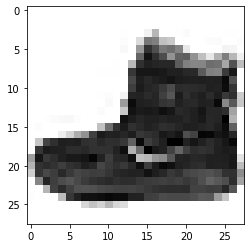

In [5]:
plt.imshow(x_train[0],cmap="gray_r")

In [6]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_train = x_train/x_train.max()
x_test = x_test/x_test.max()

In [9]:
x_test.min()

0.0

In [10]:
x_train.min()

0.0

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_train = x_train.reshape(60000,28,28,1)

In [13]:
x_test = x_test.reshape(10000,28,28,1)

In [14]:
x_train.shape

(60000, 28, 28, 1)

In [15]:
x_test.shape

(10000, 28, 28, 1)

In [16]:
from keras.utils.np_utils import to_categorical

In [17]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10) 

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten

In [19]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation="relu"))
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,1),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=(28,28,1),activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=(28,28,1),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",
             optimizer="rmsprop",
             metrics=["accuracy"] 
             )

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        16416     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          32832     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 64)          65600     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [21]:
model.fit(x_train,y_cat_train,verbose=1,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.7122 - accuracy: 0.7365
Epoch 2/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3171 - accuracy: 0.8848
Epoch 3/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2761 - accuracy: 0.8984
Epoch 4/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2493 - accuracy: 0.9108
Epoch 5/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2390 - accuracy: 0.9165
Epoch 6/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2320 - accuracy: 0.9190
Epoch 7/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2377 - accuracy: 0.9180
Epoch 8/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2395 - accuracy: 0.9182
Epoch 9/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2458 - accuracy: 0.9174
Epoch 10/20
1875/1875 [==============================] - 31s 16m

In [27]:
model.metrics_names

['loss', 'accuracy']

In [28]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3724 - accuracy: 0.8707


[0.37242475152015686, 0.8707000017166138]

In [30]:
from sklearn.metrics import classification_report

In [32]:
predictions = model.predict_classes(x_test)

In [33]:
predictions

array([9, 2, 1, ..., 8, 1, 5])

In [34]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1000
           1       0.97      0.98      0.98      1000
           2       0.70      0.90      0.79      1000
           3       0.89      0.91      0.90      1000
           4       0.91      0.66      0.76      1000
           5       0.96      0.98      0.97      1000
           6       0.65      0.64      0.64      1000
           7       0.93      0.97      0.95      1000
           8       0.98      0.91      0.94      1000
           9       0.98      0.92      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000

